In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow import keras


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


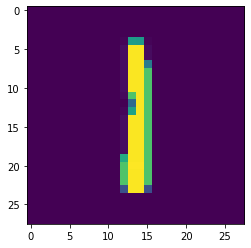

In [3]:
disp = train_data.iloc[2].values[1:]
disp = disp.reshape(28,28)
plt.imshow(disp)

In [4]:
y_train = (train_data['label']).to_numpy()
X_train = (((train_data.copy()).drop('label',axis = 1))/255)
X_train = (X_train.to_numpy()).reshape((len(train_data),28,28))
X_test = (test_data.copy())/255
X_test = (X_test.to_numpy()).reshape((len(test_data),28,28))
X_test.shape


(28000, 28, 28)

In [5]:
model = keras.Sequential([
             #keras.layers.Conv2D(filters = 32,
             #                   activation = 'relu',
             #                   kernel_size = 4,
             #                   input_shape = (28,28,1)),
             #keras.layers.Flatten(),
        
             #keras.layers.Dense(units =112,
             #                  activation = 'relu'
             #               ),
             #keras.layers.Dense(10,activation= 'softmax')
         
        keras.layers.Flatten(input_shape =(28,28)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10,   activation='softmax')
                             ])
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01),loss ='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10, validation_split=0.3)

Epoch 1/10
919/919 [==============================] - 3s 3ms/step - loss: 0.3265 - accuracy: 0.9047 - val_loss: 0.2106 - val_accuracy: 0.9441
Epoch 2/10
919/919 [==============================] - 3s 3ms/step - loss: 0.2099 - accuracy: 0.9412 - val_loss: 0.2155 - val_accuracy: 0.9429
Epoch 3/10
919/919 [==============================] - 3s 3ms/step - loss: 0.1757 - accuracy: 0.9530 - val_loss: 0.1874 - val_accuracy: 0.9556
Epoch 4/10
919/919 [==============================] - 3s 3ms/step - loss: 0.1581 - accuracy: 0.9575 - val_loss: 0.1963 - val_accuracy: 0.9577
Epoch 5/10
919/919 [==============================] - 3s 4ms/step - loss: 0.1415 - accuracy: 0.9632 - val_loss: 0.2277 - val_accuracy: 0.9585
Epoch 6/10
919/919 [==============================] - 3s 3ms/step - loss: 0.1368 - accuracy: 0.9650 - val_loss: 0.2641 - val_accuracy: 0.9408
Epoch 7/10
919/919 [==============================] - 3s 3ms/step - loss: 0.1183 - accuracy: 0.9688 - val_loss: 0.1785 - val_accuracy: 0.9592
Epoch 

In [6]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
submission.to_csv('submission.csv', index=False)


6

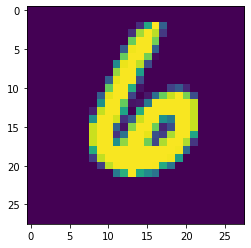

In [7]:
disp = X_test[50].reshape(28,28)
plt.imshow(disp)
y_pred[50]